In [31]:
from pycaret.classification import *


from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
df = pd.read_csv('../csv/scaled_data.csv')
# use os to store csv file

x = df.drop(['Credit_Score'],axis=1)
column = x.columns
y = df["Credit_Score"]



In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

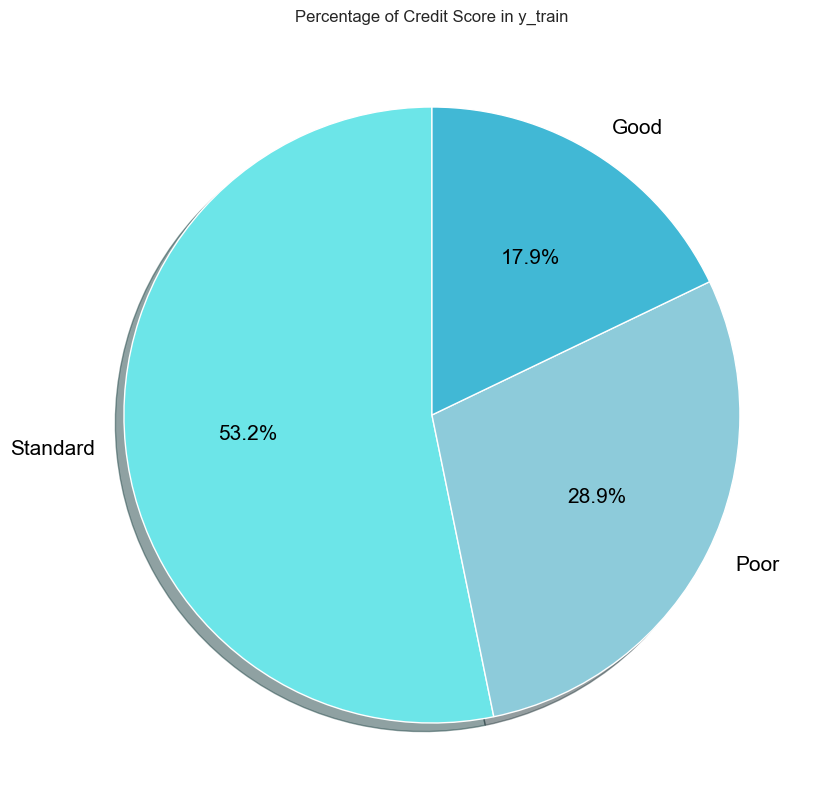

In [34]:
# plot percentage of y-train as pie chart
y_train_copy = y_train.copy()
y_train_copy = y_train_copy.map({0:"Poor",1:"Standard",2:"Good"})
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,10))
colro = ["#6CE5E8","#8DCBDA","#41B8D5"]
# make text color white and background color black
plt.pie(y_train_copy.value_counts(),labels=y_train_copy.value_counts().index,autopct='%1.1f%%',shadow=True, startangle=90,colors=colro,textprops={'color':"black",'fontsize': 15})
plt.title("Percentage of Credit Score in y_train")
plt.show()


In [35]:
sm = SMOTE(k_neighbors=5)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

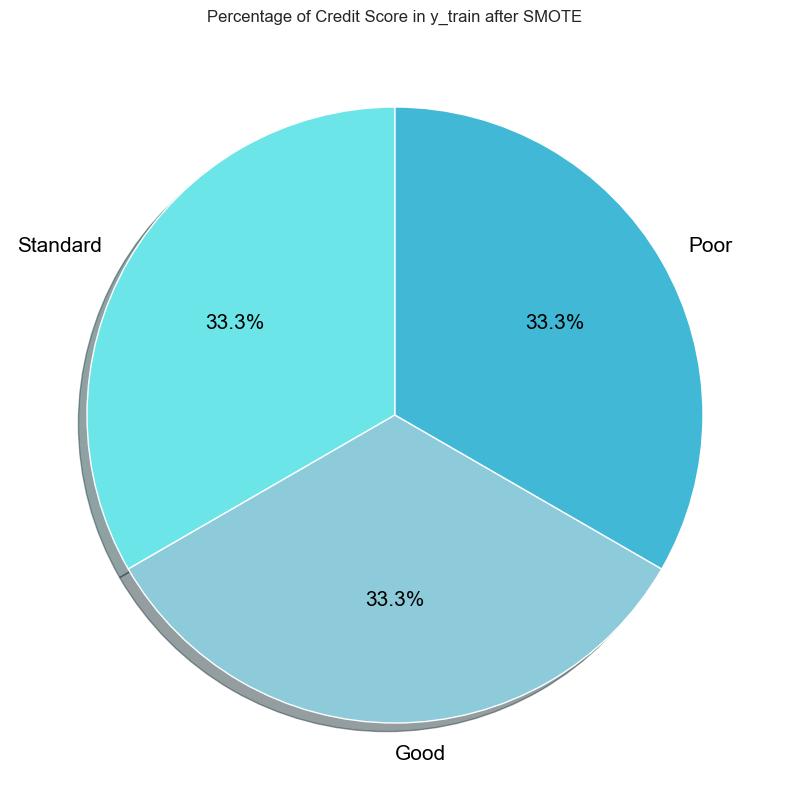

In [36]:
y_train_sm_copy = y_train_sm.copy()
y_train_sm_copy = y_train_sm_copy.map({0:"Poor",1:"Standard",2:"Good"})
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,10))
plt.pie(y_train_sm_copy.value_counts(),labels=y_train_sm_copy.value_counts().index,autopct='%1.1f%%',shadow=True, startangle=90,colors=colro,textprops={'color':"black",'fontsize': 15})
plt.title("Percentage of Credit Score in y_train after SMOTE")
plt.show()

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)
des_tree = DecisionTreeClassifier(random_state=42)


In [38]:
rf_model.fit(x_train_sm, y_train_sm)
et_model.fit(x_train_sm, y_train_sm)
knn_model.fit(x_train_sm, y_train_sm)
des_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [39]:
rf_predictions = rf_model.predict(x_test)
et_predictions = et_model.predict(x_test)
knn_predictions = knn_model.predict(x_test)
des_predictions = des_tree.predict(x_test)

In [40]:
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('Extra Trees', et_model),
    ("Decision Tree", des_tree),
    ("KNN", knn_model)
], voting='hard',weights=[1,1,1,1])

In [41]:
ensemble_model.fit(x_train_sm, y_train_sm)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Extra Trees',
                              ExtraTreesClassifier(random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))],
                 weights=[1, 1, 1, 1])

In [42]:
ensemble_predictions = ensemble_model.predict(x_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")

Ensemble Model Accuracy: 0.8414


In [43]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
des_accuracy = accuracy_score(y_test, des_predictions)


print(f"Random Forest Classifier Accuracy: {rf_accuracy}")
print(f"Extra Trees Classifier Accuracy: {et_accuracy}")
print(f"KNN Classifier Accuracy: {knn_accuracy}")
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
print(f"Decision Tree Accuracy: {des_accuracy}")





Random Forest Classifier Accuracy: 0.8393
Extra Trees Classifier Accuracy: 0.83855
KNN Classifier Accuracy: 0.82725
Ensemble Model Accuracy: 0.8414
Decision Tree Accuracy: 0.8244


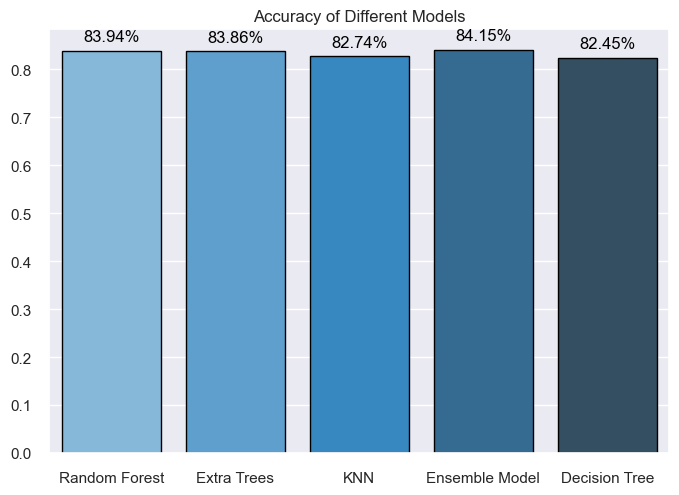

In [44]:
res_plot = pd.DataFrame({
    "Random Forest": [rf_accuracy],
    "Extra Trees": [et_accuracy],
    "KNN": [knn_accuracy],
    "Ensemble Model": [ensemble_accuracy],
    "Decision Tree": [des_accuracy]
}, index=["Accuracy"])
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round((p.get_height()+.0001) * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models")
plt.show()


In [46]:
cross_val_rf = cross_val_predict(rf_model, x_train_sm, y_train_sm, cv=10)
cross_val_et = cross_val_predict(et_model, x_train_sm, y_train_sm, cv=10)
cross_val_knn = cross_val_predict(knn_model, x_train_sm, y_train_sm, cv=10)
cross_val_des = cross_val_predict(des_tree, x_train_sm, y_train_sm, cv=10)
cross_val_ensemble = cross_val_predict(ensemble_model, x_train_sm, y_train_sm, cv=10)

print(f"Random Forest Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_rf)}")
print(f"Extra Trees Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_et)}")
print(f"KNN Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_knn)}")
print(f"Ensemble Model Accuracy: {accuracy_score(y_train_sm, cross_val_ensemble)}")
print(f"Decision Tree Accuracy: {accuracy_score(y_train_sm, cross_val_des)}")

Random Forest Classifier Accuracy: 0.8851203758073987
Extra Trees Classifier Accuracy: 0.8865374828733608
KNN Classifier Accuracy: 0.8852064983362693
Ensemble Model Accuracy: 0.8871481698962616
Decision Tree Accuracy: 0.8672382070855353


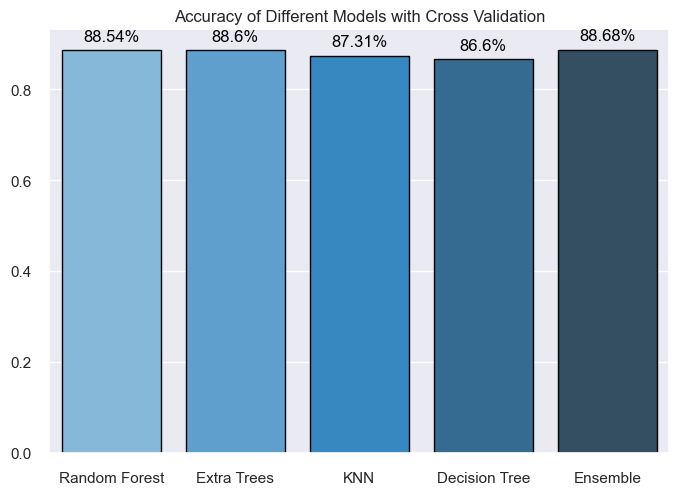

In [ ]:
res_plot_vol = pd.DataFrame({
    "Random Forest": [accuracy_score(y_train_sm, cross_val_rf)],
    "Extra Trees": [accuracy_score(y_train_sm, cross_val_et)],
    "KNN": [accuracy_score(y_train_sm, cross_val_knn)],
    "Decision Tree": [accuracy_score(y_train_sm, cross_val_des)],
    "Ensemble": [accuracy_score(y_train_sm, cross_val_ensemble)]
})
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot_vol, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round(p.get_height() * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models with Cross Validation")
plt.show()

